# Problem Statement

Aim of this exercise is to get initial insights of the Irish flowers dataset and develop a predictor model using Niave Bayes algorithm.

Naive Bayes algorithm works on the bayes theorem. It is having a naive assumption that each feature is independent of others for the given class of output.. In real world that assumption is not valid but still this algorithm works on many complex problems and gives good performance.

P(A|B)= P(B|A) * P(A) /P (B)

Naive Bayes algorithm is generally used when the dataset is quite small or if we have very small training data. Also multiclass classification is quite a trivial problem in naive bayes unlike in SVC. That is because naive bayes simply compares relative conditional probability of each class and simply assigns it highest valued class label.

### Methodology

Naive Bayes model development is divided into multiple steps as mentioned below,
1. Data exploring and understanding: This step involves preliminary level data understanding and exploring.

2. Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis. 

3. Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.

4. Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type. 

5. Train-test split: This step involves spliting the dataset into train and test parts.

6. Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.

7. Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Import Dependancies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve

## Reading Dataset

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Data overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observation,
- Data is having 4 feature columns and 1 class column.
- Data is having 150 entries without any null value.
- Dtype for feature columns is flaot64.

## 1. Data Exploration and Understanding

<AxesSubplot:xlabel='sepal_length'>

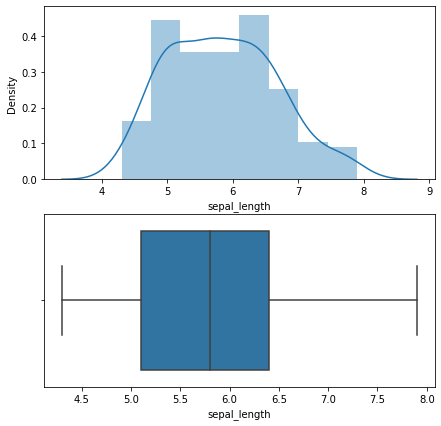

In [5]:
# sepal_length: length of sepal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.sepal_length)
plt.subplot(2,1,2)
sns.boxplot(data.sepal_length)

- Sepal length is having range from 4 to 8. 
- The median value for sepal length is 5.8 units. 
- We don't observe any outlier in the sepal length.

<AxesSubplot:xlabel='sepal_width'>

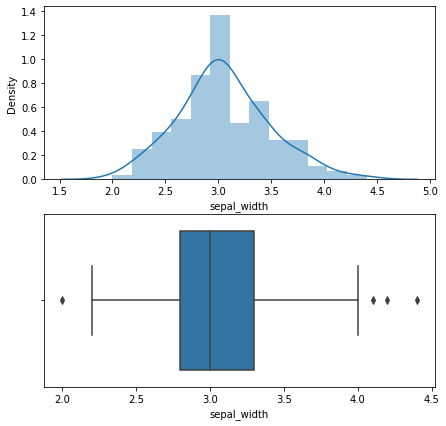

In [6]:
# sepal_width: width of sepal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.sepal_width)
plt.subplot(2,1,2)
sns.boxplot(data.sepal_width)

- Sepal width is having range from 1.5 to 5. 
- The median value for sepal width is 3 units. 
- We can see few outliers in the sepal width on both sides.

<AxesSubplot:xlabel='petal_length'>

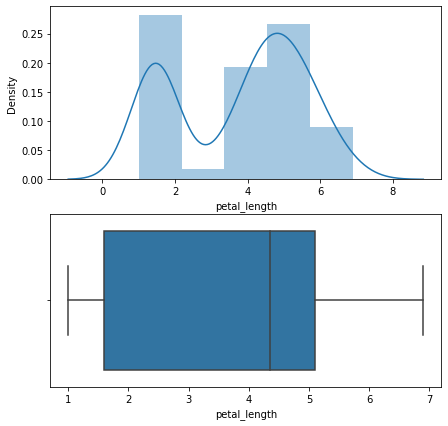

In [7]:
# petal_length: length of petal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.petal_length)
plt.subplot(2,1,2)
sns.boxplot(data.petal_length)

- petal length is having range from 1.5 to 7.
- The median value for petal length is 4.5 units.
- The distribution of petal length is not normal. 

<AxesSubplot:xlabel='petal_width'>

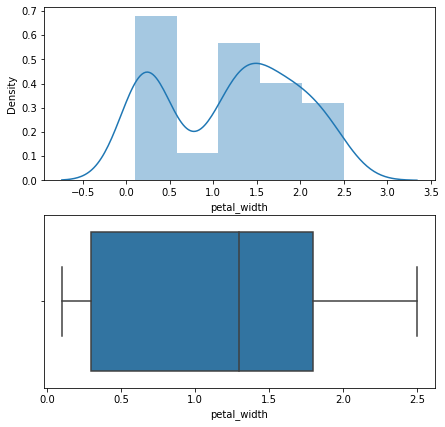

In [8]:
# petal_width: width of petal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.petal_width)
plt.subplot(2,1,2)
sns.boxplot(data.petal_width)

- petal width is having range from 0.2 to 2.5.
- The median value for petal width is 1.3 units.
- The distribution of petal width is not normal.

In [9]:
# Species

data.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

- There are three classes in species variable.
- Class distribution in uniform.

## 2. Data Cleaning

The data is already clean and clear. Hence, we do not need any form of data cleaning step here.

## 3. Data Visualization

<AxesSubplot:>

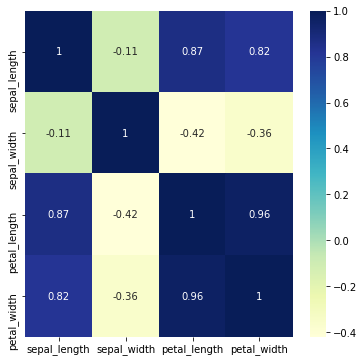

In [10]:
# Pearson's correlation

# heatmap
plt.subplots(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

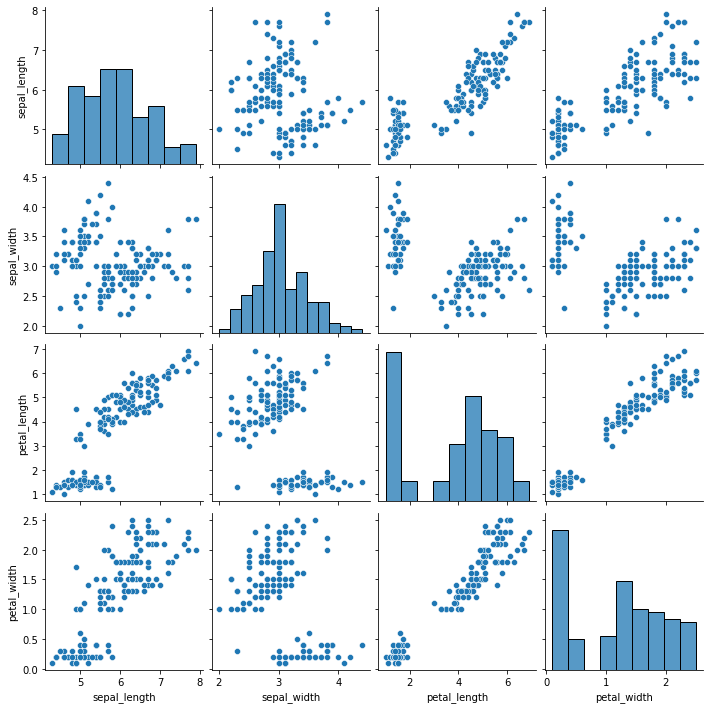

In [11]:
# pairplot: Visualizing scatter plot between numeric columns

sns.pairplot(data)

Observations,
- petal_length and petal_width are having very high correlation of 0.96. We can drop petal_width.
- sepal_width is having negative correlation with sepal_length, petal_length and petal_width.
- Similar correlation can be observed in pairplot as well.

In [12]:
# Dropping 'petal_width'

data = data.drop('petal_width', axis=1)

## 4. Data Preparation

In [13]:
# mapping species column to integer values

data.species = data.species.map({'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2})

In [14]:
# splitting into X and y

X = data.drop('species', axis=1)
y = data['species'].astype('int64')

## 5. Train-Test split

In [15]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

Note: Here are not using 'stratify' parameter of train_test_split function as datset is uniformaly distrubited amongs various classes. This parameters should be used when dataset is having skewed distribution amongs various classes.

#### Scaling the features

In [16]:
# Minmax scaling

# instantiating the scalers
scaler_X = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), index=X_test.index, columns=X_test.columns)

## 6. Model Development - Validation and Evaluation

Here, we are going to use gaussian naive bayes classifier becasue each feature in having continuous and Gaussian/Naormal distribition. There are other types of Niave Bayes classifiers and their applicability dependes upon the kind of feature space we are dealing with.

More reading:
https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

In [17]:
# Gaussian Naive bayes classifier

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# Making prediction

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Accuracy comparison between Train and Test sets

In [19]:
# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, y_test_pred),2))

Train accuracy: 0.88
Test accuracy: 0.89


It can be observed that both train and test accuracies are almost same. Hence model is performing good on the dataset.

#### Confusion Matrix

Confusion matrix for multiclass classification:

<img src="files/CM.png">

- All the correctly predicted labels would appear along the diagonal of the matrix.
- For successfull classification the confusion matrix should be diagonally sparse.

Text(0.5, 1.0, 'Test set')

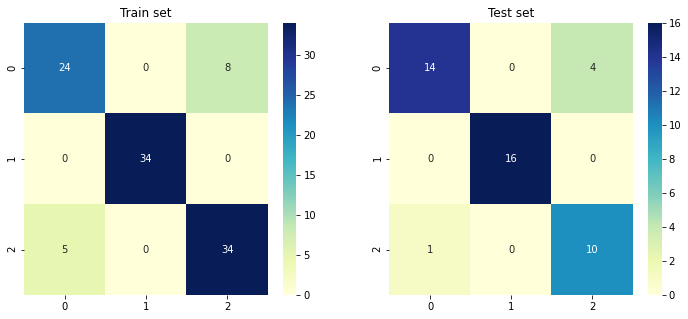

In [20]:
# confusion matrix: train  and test sets

plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax1.set_title('Train set')


ax2 = plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax2.set_title('Test set')

We can observe that,
- confusion matrix for trainset is diagonally sparse. 
- We have only 13 incorrect predictions out 105 train data entries.
- We have only 5 incorrect predictions out 45 test data entries.

#### Classification report

- Classification report shows derived parameters from confusion matrix viz precision, recall, f-score and support(true occurence belong to the class) for each sub-class.
- It also includes corresponding macro and weghted average values as well. 

In [21]:
# classification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       1.00      1.00      1.00        34
           2       0.81      0.87      0.84        39

    accuracy                           0.88       105
   macro avg       0.88      0.87      0.88       105
weighted avg       0.88      0.88      0.88       105



Observations as per classification report,
- f1-score summarizes both precision and recall scores. f1 values are acceptable for each class.
- macro and weighted average for all the class is 0.88 which is good.

In [22]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       1.00      1.00      1.00        16
           2       0.71      0.91      0.80        11

    accuracy                           0.89        45
   macro avg       0.88      0.90      0.88        45
weighted avg       0.90      0.89      0.89        45



The above classification report for test data states that there isn't any overfitting with the model. The model is performing really well on the dataset. One reason bihind that is the gaussian naive bayes classifier is much more capable algorithm.

#### Hype-parameter tuning

Hyper-parameter to tune:


var_smoothing: Variance smoothing is a variant of Laplace smoothing in the sense that the 'var_smoothing' parameter specifies the portion of the largest variance of all features to be added to variances for calculation stability.

In [23]:
# parameters grid
params = {'var_smoothing': np.logspace(0,-13, num=100)}

model2 = GaussianNB()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model2, 
                        param_grid = params, 
                        scoring= 'accuracy',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    


model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 7.39072203e-01, 5.46227722e-01, 4.03701726e-01,
       2.98364724e-01, 2.20513074e-01, 1.62975083e-01, 1.20450354e-01,
       8.90215085e-02, 6.57933225e-02, 4.86260158e-02, 3.59381366e-02,
       2.65608778e-02, 1.9...
       3.12571585e-11, 2.31012970e-11, 1.70735265e-11, 1.26185688e-11,
       9.32603347e-12, 6.89261210e-12, 5.09413801e-12, 3.76493581e-12,
       2.78255940e-12, 2.05651231e-12, 1.51991108e-12, 1.12332403e-12,
       8.30217568e-13, 6.13590727e-13, 4.53487851e-13, 3.35160265e-13,
       2.47707636e-13, 1.83073828e-13, 1.35304777e-13, 1.00000000e-13])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [24]:
# Checking performance variation with parameter value

cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002894,0.001018,0.001902,0.001457,1.000000,{'var_smoothing': 1.0},0.904762,0.809524,0.857143,0.857143,...,0.857143,0.030117,100,0.869048,0.892857,0.869048,0.869048,0.833333,0.866667,0.019048
1,0.001724,0.000049,0.001001,0.000083,0.739072,{'var_smoothing': 0.7390722033525778},0.904762,0.809524,0.857143,0.904762,...,0.885714,0.048562,10,0.869048,0.880952,0.857143,0.869048,0.833333,0.861905,0.016148
2,0.001844,0.000119,0.001024,0.000070,0.546228,{'var_smoothing': 0.5462277217684341},0.904762,0.761905,0.857143,0.904762,...,0.876190,0.064594,96,0.869048,0.880952,0.869048,0.869048,0.845238,0.866667,0.011664
3,0.001832,0.000166,0.001009,0.000088,0.403702,{'var_smoothing': 0.4037017258596554},0.904762,0.809524,0.809524,0.857143,...,0.866667,0.055533,99,0.857143,0.892857,0.880952,0.880952,0.857143,0.873810,0.014286
4,0.001771,0.000045,0.000968,0.000022,0.298365,{'var_smoothing': 0.29836472402833386},0.952381,0.809524,0.809524,0.857143,...,0.876190,0.064594,96,0.857143,0.892857,0.880952,0.880952,0.869048,0.876190,0.012141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001719,0.000023,0.001018,0.000081,0.000000,{'var_smoothing': 3.351602650938834e-13},0.952381,0.809524,0.857143,0.857143,...,0.885714,0.057143,10,0.892857,0.892857,0.892857,0.892857,0.892857,0.892857,0.000000
96,0.001755,0.000049,0.000965,0.000009,0.000000,{'var_smoothing': 2.4770763559917037e-13},0.952381,0.809524,0.857143,0.857143,...,0.885714,0.057143,10,0.892857,0.892857,0.892857,0.892857,0.892857,0.892857,0.000000
97,0.001747,0.000082,0.000967,0.000019,0.000000,{'var_smoothing': 1.8307382802953623e-13},0.952381,0.809524,0.857143,0.857143,...,0.885714,0.057143,10,0.892857,0.892857,0.892857,0.892857,0.892857,0.892857,0.000000
98,0.001706,0.000050,0.000957,0.000024,0.000000,{'var_smoothing': 1.353047774579802e-13},0.952381,0.809524,0.857143,0.857143,...,0.885714,0.057143,10,0.892857,0.892857,0.892857,0.892857,0.892857,0.892857,0.000000


<AxesSubplot:xlabel='param_var_smoothing', ylabel='mean_test_score'>

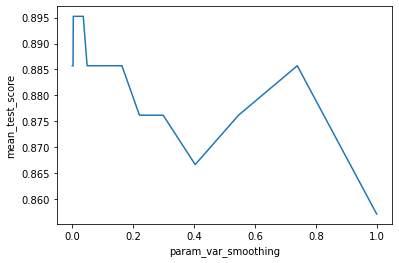

In [25]:
# plotting cv test accuracy Vs var_smoothing parameter value

sns.lineplot(x=cv_res.param_var_smoothing, y= cv_res.mean_test_score)

In [26]:
# best parameter as per grid search CV

model_cv.best_params_

{'var_smoothing': 0.03593813663804626}

In [27]:
# building model using best parameter values

model3 = GaussianNB(var_smoothing = model_cv.best_params_['var_smoothing'])
model3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.03593813663804626)

In [28]:
# Making prediction

y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

In [29]:
# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, y_test_pred),2))

Train accuracy: 0.89
Test accuracy: 0.89


Text(0.5, 1.0, 'Test set')

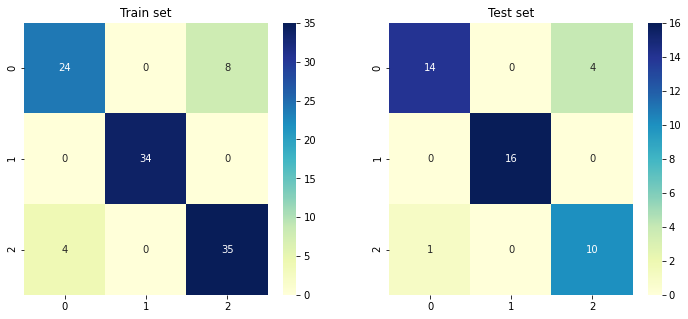

In [30]:
# confusion matrix: train  and test sets

plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax1.set_title('Train set')


ax2 = plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax2.set_title('Test set')

In [31]:
# classification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       1.00      1.00      1.00        34
           2       0.81      0.90      0.85        39

    accuracy                           0.89       105
   macro avg       0.89      0.88      0.88       105
weighted avg       0.89      0.89      0.88       105



Observation,

- there isnt any considerable improvement in train-test accuracies or other derived matrices after using best parameters from grid search CV. 

## 7. Conclusion

- Gaussian Naive Bayes algorithm is resulting in the ~0.89 accuracy on Iris dataset.
- Precision-recall and f1 score values are near to 0.9.
- Naive Bayes algorithm is capable of solving very complex problems (e.g text classification) and dealing with too large or small datasets. Hence, getting good performance on Irish dataset is not an eye opener.

------